# Introdução à Machine Learning
## Support Vector Machine Classifier

---

# Sumário

1. Introdução à Machine Learning - Support Vector Machine Classifier  
2. O que é o SMV? Como funciona  
3. Vantagens e Desvantagens do SMV  
4. Aplicações do SMV e Considerações Atuais sobre o Modelo  
5. Dados Não Linearmente Separáveis e Função Kernel (Kernel Trick)  
6. Exemplo Numérico Simples - Kernel Polinomial de Grau 2  
7. Pontos de Dados quase sobrepostos  
8. Target Label e Feature Engineering Conceitual  
9. Caso Prático e criando um Modelo Básico  
10. Overfitting e Underfitting  
11. Feature Engineering Prática - Dados Titanic  
12. Encoding de Features Categóricas  
13. Data Splitting e Padronização/Normalização (Scaling)  
14. Otimização de Hiperparâmetros: GridSearch, RandomSearch e Bayesian Optimization  
15. State of the Art: Optuna  
16. Métricas de Avaliação de Modelos  
17. Estruturação final do Modelo SMV  
18. Previsão e Avaliação

# Página 1

# Introdução à Machine Learning - Support Vector Machine Classifier

Machine Learning é uma técnica computacional para inferência de funções desconhecidas. Podemos modelar funções que mapeiam x à y a partir de base teoricas e análise fundamentalista, porém, o que fazer quando esse tipo de modelagem não for possível? O machine learning foi criado justamente para esse tipo de problema, onde há uma convulação de variáveis e complexidades tão grandes que é quase impossível construir uma "função" puramente apartir de conceitos teóricos. 

Imagine o seguinte: Algum amigo seu têm um portfólio de ações que fez muito dinheiro e você o pergunta como ele fez pra prever seus valores e acertar com consistência, e ele te responde que essas previsões foram baseadas em intuição e identificação de padrões passados das respectivas ações avaliadas. Modelos de ML funcionam dessa mesma maneira.

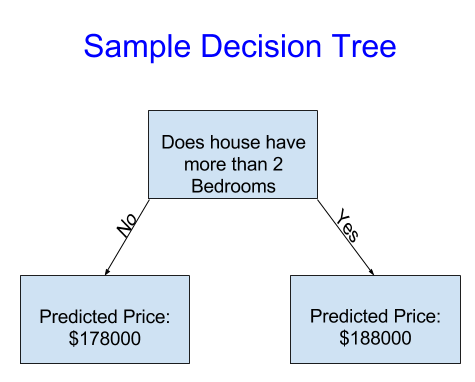

Usando o simplificado modelo de Decision Tree acima, vemos que as casas são separadas em duas categorais, casas com mais de 2 quartos e casas com 2 ou menos quartos, em seguida há uma previsão de preço para cada uma das categorias, que nesse caso seriam a média historica do preço de casas na mesma categoria.

Os dados são usados para separar as casas em diferentes grupos, no exemplo acima, quartos seria uma feature, a captura de padrões advindos dos dados é chamado de #fitting ou #training, os dados usados unicamente para "fitar" o modelo são chamados de #training data. O modelo treinado é em seguida usado para previsão do valor de outras casas.

# Qual dos modelos abaixo apresenta uma previsão mais crível sobre os valores das caras?

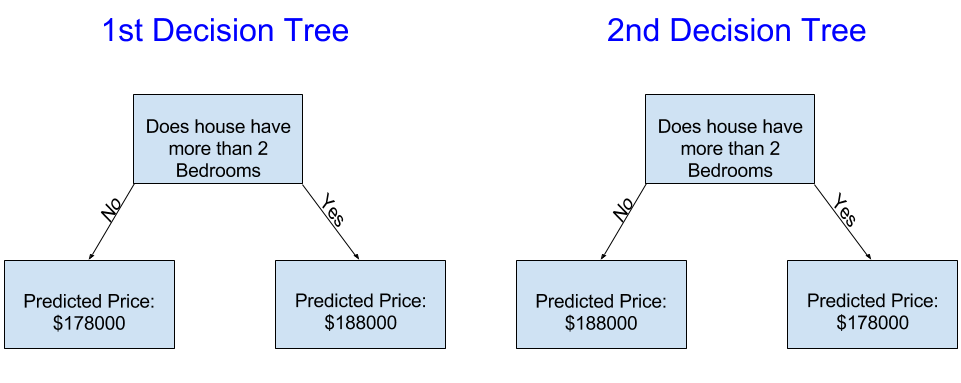

Provávelmente o primeiro, já que teóricamente e empiricamente, casas com mais quartos são mais caras no mercado imobiliario. Então, percebe-se que mesmo usando Machine Learning, ainda se faz necessário conhecer as especificidades do problema e como o mesmo funciona no mundo real.

Assim, chegamos a um ponto muito importante que pode ser considerado como modelagem fundamentalista, empírica ou teórica sobre os problemas - Feature e Feature Engineering. Repare que no modelo passado anteriormente, a única variável que explica os valores de casas é "quantidade de quartos", porém, essa seria realmente a única? 

Pensando téorica e empiracamente, sabemos que o preço das casas também é afetado pelo tamanho do terreno, tamanho da área construida, localização, número de banheiros, suites e demais instalações, logo, por quê não usamos essas outras variáveis como features? É o que deve ser feito.

# Regressão x Classificação

## Modelos de Regressão

**Definição**: Modelos que **preveem valores contínuos**.

**Exemplo**: Dadas características como volatilidade e média de retornos passados, prever o preço de fechamento de uma ação no dia seguinte.

## Modelos de Classificação

**Definição**: Modelos que **associam uma classe ou categoria** a um determinado ponto de dados.

**Exemplo**: Dadas características como volatilidade e média de retornos passados, determinar se uma ação irá subir ou descer no fechamento do dia seguinte

## Interseção entre Regressão e Classificação

É possível utilizar as mesmas variáveis para diferentes tipos de modelos, dependendo do objetivo:

- **Regressão**: Prever o peso de uma pessoa com base na altura e sexo (valor contínuo).
- **Classificação**: Categorizar uma pessoa como "magra", "sobre-peso", "acima do peso" ou "obesa", com base na altura e sexo.

## Pequeno Resumo

- **Escolha do Modelo**: Depende do tipo de variável que você deseja prever (contínua ou categórica).
- **Preparação dos Dados**: Para classificação, é necessário que a variável alvo (Target) seja categórica.
- **Avaliação do Modelo**: Utilize métricas apropriadas para cada tipo de modelo (RMSE para regressão, acurácia para classificação, etc.).

| **Tipo de Modelo**     | **Regressão**                                                                 | **Classificação**                                                      |
|------------------------|------------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Definição**          | Prevê valores contínuos                                                      | Associa uma classe ou categoria a um ponto de dados                    |
| **Exemplo de Problema**| Prever o preço de fechamento de uma ação no dia seguinte                    | Determinar se uma ação vai subir ou descer no fechamento do dia seguinte|
| **Modelos Comuns**     | Regressão Linear, Random Forest Regressor, Gradient Boosting Regressor,     | Regressão Logística, Random Forest Classifier, SVM, GBM, Naive Bayes,  |
|                        | Decision Tree Regressor, Redes Neurais                                      | Redes Neurais para Classificação                                       |
| **Exemplos de Uso**    | - Prever o preço de uma ação                                               | - Classificar e-mails como "Spam" ou "Não Spam"                       |
|                        | - Estimar a renda mensal de uma pessoa                                      | - Determinar se um cliente vai cancelar uma assinatura                |
|                        | - Prever a temperatura de uma cidade no próximo dia                        | - Identificar a presença de uma doença com base em sintomas           |
|                        | - Prever a quantidade de vendas de um produto                              | - Prever se um cliente irá comprar um produto                         |

# Página 2
# O que é o SVM?

O **Support Vector Machine (SVM)** é um algoritmo de aprendizado de máquina supervisionado usado para tarefas de **classificação** e **regressão**. Seu objetivo principal é encontrar a melhor forma de separar dados em diferentes categorias, por isso, sua principal aplicação são problemas de Classificação.


## Como o SVM Funciona?

Imagine que você tem um conjunto de pontos em um gráfico, representando duas categorias diferentes, como maçãs e laranjas. O SVM procura o **hyperplano**, **linha** (em duas dimensões) ou o **plano** (em três dimensões), que melhor divide esses pontos em suas respectivas categorias. Mas não é qualquer linha, o SVM busca a linha que deixa a maior **margem** possível entre as duas categorias. Isso significa que está tentando fazer a separação de forma mais clara e definida possível.

No diagrama abaixo, H1, H2 e H3 são todos possíveis hyperplanos:


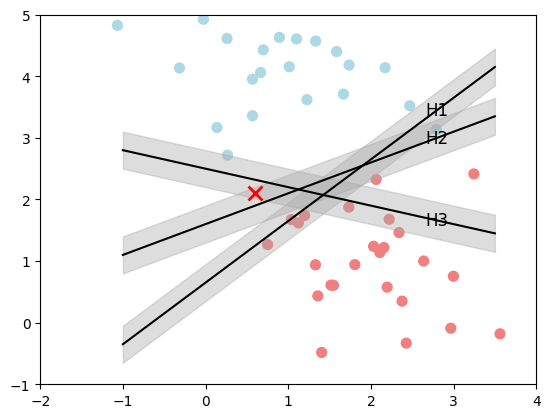

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs

# Generate example data with greater dispersion for overlap
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.8)

# Define custom colors
custom_cmap = ListedColormap(["lightblue", "lightcoral"])

# Generate x values for fitting lines
xfit = np.linspace(-1, 3.5, 500)  # Dense points for smoothness

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=custom_cmap)
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# Define hyperplanes with labels and add shaded regions
hyperplanes = [
    (1, 0.65, 'H1'),  # h1 does not separate perfectly
    (0.5, 1.6, 'H2'),  # h2 separates perfectly
    (-0.3, 2.5, 'H3')  # h3 does not separate perfectly
]

d = 0.3  # Width of the shaded region

for m, b, label in hyperplanes:
    # Calculate y values for the hyperplanes
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k', linewidth=1.5)  # Plot the line
    plt.fill_between(xfit, yfit - d, yfit + d, color='#AAAAAA', alpha=0.4)  # Add shading
    # Position the label near the line
    x_label, y_label = 2.8, m * 2.8 + b
    plt.text(x_label, y_label, label, fontsize=12, color="black", ha="center", va="center")

# Adjust plot limits
plt.xlim(-2, 4)
plt.ylim(-1, 5)
plt.show()

Podemos ver, também, que os pontos são linearmente separáveis e existem infinitos planos que podem separar perfeitamente as duas categorias. Apesar disso, o ponto **H3** é claramento o pior, pois em sua separação, pontos que pertencem a categoria "vermelha" foram agrupados com os de categoriza "azul", e o melhor hyperplano é o **H2** pois além de os separar perfeitamente, também é o hyperplano que com a maior distância entre as classes.

- **Margem Máxima**: O SVM encontra a linha ou plano que separa as categorias com a maior distância possível entre os pontos mais próximos de cada categoria. Esses pontos críticos são chamados de **vetores de suporte**.

# Página 3
# Vantagens e Desvantagens do SVM

## Vantagens

1. **Eficaz em Dados de Alta Dimensionalidade**:

   - O SVM funciona bem quando você tem muitos atributos ou características em seus dados.
   - Por exemplo, em problemas de reconhecimento de texto, onde cada palavra pode ser uma característica.

2. **Bom Desempenho com Poucos Dados**:

   - Pode funcionar bem mesmo com um número limitado de dados de treinamento.
   - Isso é útil em áreas onde é difícil coletar muitos dados, como em pesquisas científicas baseadas em amostras.

3. **Flexibilidade com Funções Kernel**:

   - Permite resolver problemas complexos onde as categorias não podem ser separadas por uma linha reta.
   - As funções kernel transformam os dados para facilitar a separação.

4. **Robustez contra Overfitting**:

   - O SVM tende a generalizar bem para novos dados, evitando se ajustar excessivamente aos dados de treinamento.
   - Isso significa que o modelo funciona bem não apenas nos dados que já viu, mas também em dados novos.

5. **Solução Ótima Global**:

   - O algoritmo do SVM garante encontrar a melhor solução possível, não ficando preso em máximos locais.

| **Vantagem**                                 | **Descrição**                                                                                             |
| -------------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| **Eficaz em Dados de Alta Dimensionalidade** | O SVM funciona bem quando há muitos atributos ou características nos dados. Ex.: reconhecimento de texto. |
| **Bom Desempenho com Poucos Dados**          | Funciona bem com poucos dados de treinamento. Útil em áreas com coleta limitada de dados.                 |
| **Flexibilidade com Funções Kernel**         | Resolve problemas complexos com funções kernel que transformam os dados para facilitar a separação.       |
| **Robustez contra Overfitting**              | Generaliza bem para novos dados, evitando ajuste excessivo aos dados de treinamento.                      |
| **Solução Ótima Global**                     | O algoritmo SVM busca o máxima global. Pois a função objetivo é convexa

## Desvantagens

1. **Escolha da Função Kernel Pode Ser Difícil**:

   - Selecionar a função kernel correta e ajustar seus parâmetros pode ser complexo.
   - Sem conhecimento prévio, pode ser necessário testar várias opções.

2. **Tempo de Treinamento com Grandes Conjuntos de Dados**:

   - O SVM pode ser lento para treinar quando há muitos exemplos.
   - Isso ocorre porque o algoritmo precisa processar todos os dados para encontrar a melhor separação.

3. **Dificuldade de Interpretação**:

   - O modelo resultante pode ser difícil de entender.
   - Não é fácil ver como cada característica individual afeta a decisão do modelo.

4. **Estimativa de Probabilidades Requer Passos Adicionais**:

   - Embora seja possível obter probabilidades associadas às previsões do SVM, isso não é fornecido de forma direta pelo modelo básico.
   - É necessário aplicar métodos adicionais, como a **calibração de Platt** ou **calibração isotônica**, para estimar as probabilidades a partir das saídas do SVM.
   - Isso adiciona um passo extra ao processo e pode aumentar a complexidade computacional.

5. **Sensível à Escala dos Dados**:

   - Se as características têm escalas muito diferentes, o SVM pode não funcionar bem.
   - É necessário normalizar ou padronizar os dados antes de usar o algoritmo.

| **Desvantagem**                                           | **Descrição**                                                                                           |
| --------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Escolha da Função Kernel Pode Ser Difícil**             | Selecionar a função kernel correta e ajustar seus parâmetros pode ser complexo.                         |
| **Tempo de Treinamento com Grandes Conjuntos**            | O SVM pode ser lento para treinar quando há muitos exemplos, devido ao processamento necessário.        |
| **Dificuldade de Interpretação**                          | O modelo resultante pode ser difícil de entender em termos de como cada característica afeta a decisão. |
| **Estimativa de Probabilidades Requer Passos Adicionais** | Calibração de Platt ou isotônica é necessária para obter probabilidades, aumentando a complexidade.     |
| **Sensível à Escala dos Dados**                           | Características com escalas muito diferentes exigem normalização para que o SVM funcione bem.           |


# Página 4
# Aplicações do SVM

O SVM é utilizado em diversas áreas devido à sua eficácia:

- **Reconhecimento de Imagens**:
  - Classificação de objetos em imagens, como identificar se há um carro ou uma pessoa.
  - Reconhecimento de escrita à mão, como em leitura de cheques bancários.

- **Bioinformática**:
  - Análise de sequências de DNA e proteínas.
  - Ajuda na compreensão de doenças genéticas.

- **Detecção de Fraudes**:
  - Identificação de atividades suspeitas em transações financeiras.
  - Protege contra fraudes em cartões de crédito.

- **Análise de Texto**:
  - Classificação de e-mails como spam ou não spam.
  - Análise de opiniões em redes sociais para entender sentimentos.

- **Diagnóstico Médico**:
  - Auxílio na detecção de doenças com base em exames.
  - Por exemplo, identificar tumores em imagens de ressonância magnética.

# Considerações Atuais sobre o SVM

Embora o SVM seja uma ferramenta poderosa, é importante entender como ele se encaixa no contexto atual do aprendizado de máquina.

**Comparação com Redes Neurais Profundas**:
  - As **redes neurais profundas** (deep learning) tornaram-se muito populares, especialmente para grandes conjuntos de dados e tarefas complexas, como reconhecimento de voz e imagens.
  - As redes neurais podem aprender diretamente a partir de dados brutos, enquanto o SVM geralmente requer que as características sejam extraídas ou selecionadas previamente.

**Quando Usar o SVM**:
  - O SVM ainda é muito útil quando você tem:
    - **Conjuntos de dados menores ou médios**.
    - **Dados bem estruturados**.
    - **Necessidade de um modelo robusto com bom desempenho geral**.

**Ferramentas Modernas Facilitam o Uso do SVM**:
  - Existem ferramentas e bibliotecas que tornam mais fácil ajustar os hiparâmetros do SVM.
  - Isso ajuda a superar algumas das dificuldades na escolha da função kernel e outros fatores do modelo.

# Resumindo

O **Support Vector Machine** é um algoritmo eficaz e versátil para classificação e regressão. Ele é especialmente útil em situações onde os dados são de alta dimensionalidade e os conjuntos de dados não são enormes. Embora as redes neurais profundas sejam muito populares atualmente, o SVM ainda tem seu lugar e pode ser a melhor escolha em muitos casos.

Para quem está começando em aprendizado de máquina:

- O SVM é um ótimo ponto de partida para entender conceitos importantes, como separação de classes e margem máxima.
- Ele oferece um equilíbrio entre desempenho e complexidade, sem a necessidade de grandes recursos computacionais.


# Página 5
## Dados Não Linearmente Separáveis: 

 Às vezes, não é possível separar as categorias com uma linha reta. Nesses casos, o SVM usa uma técnica chamada **Kernel Trick** para transformar os dados em um espaço de maior dimensão, onde a separação linear é possível.

**Representação de dados Não Linearmente Separáveis:**

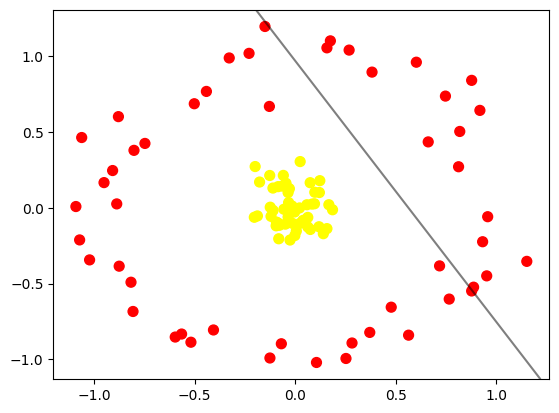

In [3]:
from sklearn.svm import SVC

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
from sklearn.datasets import make_circles
from ipywidgets import interact, fixed

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


# Função Kernel (Kernel Trick)

Como vimos, o SVM separa os pontos de dados em diferentes grupos através de um hiperplano, que pode ser uma reta em duas dimensões. No entanto, se os dados forem mais complexos, uma reta não será suficiente. É nesse ponto que o conceito de Kernel Trick se torna necessário.

**O que é uma Função Kernel?**

Uma função kernel é uma técnica matemática que mapeia os dados de entrada ("input data") para um espaço de maior dimensão, onde padrões podem ser mais facilmente identificados e classificados. Isso permite que os modelos capturem relações não lineares nos dados.

**Como Funciona o Kernel Trick?**

O Kernel Trick é um atalho matemático que utiliza uma função kernel para projetar dados complexos em um espaço de alta dimensionalidade, onde eles se tornam linearmente separáveis. A grande vantagem desse "truque" é que isso pode ser feito sem realizar os cálculos pesados normalmente associados a espaços de alta dimensionalidade.

Isso é possível porque o produto escalar entre os dados mapeados no espaço de alta dimensão pode ser expresso em termos do produto escalar entre os dados de entrada no espaço original. Dessa forma, podemos calcular as similaridades necessárias sem explicitamente converter os dados para o espaço de alta dimensão.


# Página 6
## Exemplo numérico Simples do Kernel Trick com Kernel Polinomial de Grau 2

Neste exemplo, vamos ilustrar como o Kernel Trick funciona usando um kernel polinomial de grau 2 sem constante.

**Vetores de Entrada**

Considere os dois vetores de entrada em um espaço de duas dimensões:
$$ \mathbf{x}_i = [x_{i1}, x_{i2}] = [1, 2] $$
$$ \mathbf{x}_j = [x_{j1}, x_{j2}] = [3, 4] $$

**Mapear para um Espaço de Alta Dimensionalidade**

Para um kernel polinomial de grau 2 sem constante, o mapeamento $$ \phi(\mathbf{x}) $$ para o espaço de alta dimensionalidade inclui todos os termos quadráticos e cruzados dos componentes dos vetores originais.

O mapeamento $$ \phi(\mathbf{x}) $$ para $$ \mathbf{x} = [x_1, x_2] $$ é dado por:
$$ \phi(\mathbf{x}) = [x_1^2, \sqrt{2}x_1x_2, x_2^2] $$

Aplicando o mapeamento aos nossos vetores:

$$ \mathbf{x}_i = [1, 2] $$
$$ \phi(\mathbf{x}_i) = [(1)^2, \sqrt{2} \times 1 \times 2, (2)^2] = [1, 2\sqrt{2}, 4] $$
Para $$ \mathbf{x}_j = [3, 4] $$:
$$ \phi(\mathbf{x}_j) = [(3)^2, \sqrt{2} \times 3 \times 4, (4)^2] = [9, 12\sqrt{2}, 16] $$

**Calcular o Produto Escalar no Espaço de Alta Dimensionalidade**

O produto escalar entre $$ \phi(\mathbf{x}_i) $$ e $$ \phi(\mathbf{x}_j) $$ é dado por: $$ \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle = (1)(9) + (2\sqrt{2})(12\sqrt{2}) + (4)(16) $$ $$ \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle = 9 + 48 + 64 = 121 $$

**Calcular o Kernel Diretamente no Espaço Original**

O kernel polinomial de grau 2 sem constante é definido como:

$$ K(\mathbf{x}_i, \mathbf{x}_j) = (\langle \mathbf{x}_i, \mathbf{x}_j \rangle)^2 $$
Calculando o produto escalar no espaço original:
$$ \langle \mathbf{x}_i, \mathbf{x}_j \rangle = (1)(3) + (2)(4) = 3 + 8 = 11 $$
Então, o kernel é:
$$ K(\mathbf{x}_i, \mathbf{x}_j) = (11)^2 = 121 $$

**Verificamos que são iguais**

Confirmamos que:
$$ \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle = K(\mathbf{x}_i, \mathbf{x}_j) = 121 $$
Isso demonstra que o produto escalar no espaço de alta dimensionalidade é igual ao valor do kernel calculado no espaço original.

**Resumindo: Transformamos uma função linear no espaço transformado em uma função quadrática no espaço original**

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
from sklearn.datasets import make_circles
from ipywidgets import interact, fixed

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

from mpl_toolkits import mplot3d
# Adicionar uma transformação não-linear para o eixo Z
r = X[:, 0]**2 + X[:, 1]**2  # Exemplo: distância radial ao quadrado
# Função para plotar os dados em 3D
def plot_3D(elev=30, azim=30, X=X, y=y, r=r):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='autumn', s=50)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Distância Radial')
    plt.title("Visualização 3D dos Dados")
    plt.show()

# Usar o interact para controlar os ângulos de visualização
interact(plot_3D, elev=(-90, 90), azim=(-180, 180), X=fixed(X), y=fixed(y), r=fixed(r));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

Vemos que usando uma transformação kernel, pela representação 3D acima, fica fácil encontrar um hiperplano que separa as duas classes, porém como vimos, fazer essa transformação direta para cada ponto de dados requer mais recursos computacionais, ainda mais quando usamos muitas features em datasets com muitas observações, o que é comum. Podemos, invés disso, usar funções de Kernel Trick já presentes no modelo SVM, como **RBF** (Radial Basis Function)

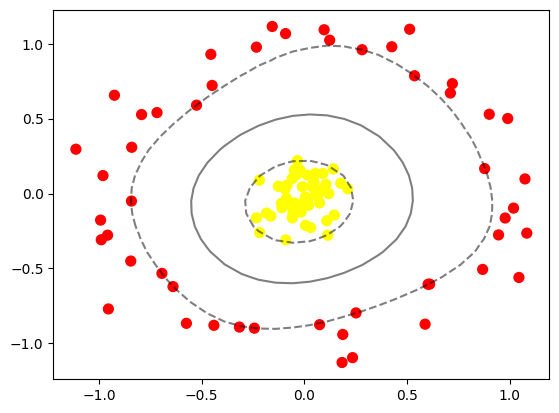

In [5]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');



# Página 7
## Pontos de Dados quase sobrepostos

Nos exemplos acima, as classes podiam ser perfeitamente separadas, porém, há casos em que isso não é possível e se faz necessária um "amaciamento" da margem. Isso quer dizer que precisamos controlar os pontos que iremos permitir estar dentro da margem se isso permitir um melhor treinamento do modelo. 

Essa maciez da margem é controlada por um dos hiper-parametros do SVM: **C**
- **C Grande** = "Margem mais dura", os pontos de dados não podem estar dentro da margem
- **C Pequeno** = "Margem mais macia", os pontos de dados podem estar dentro da margem

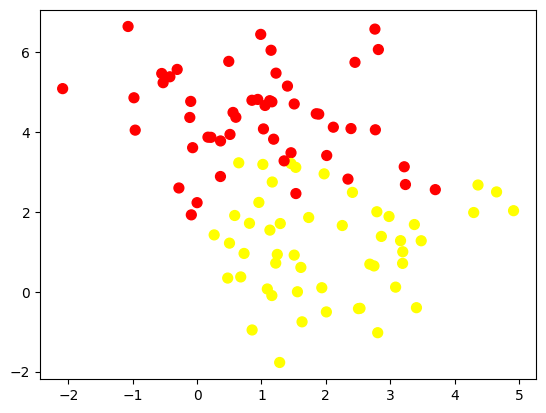

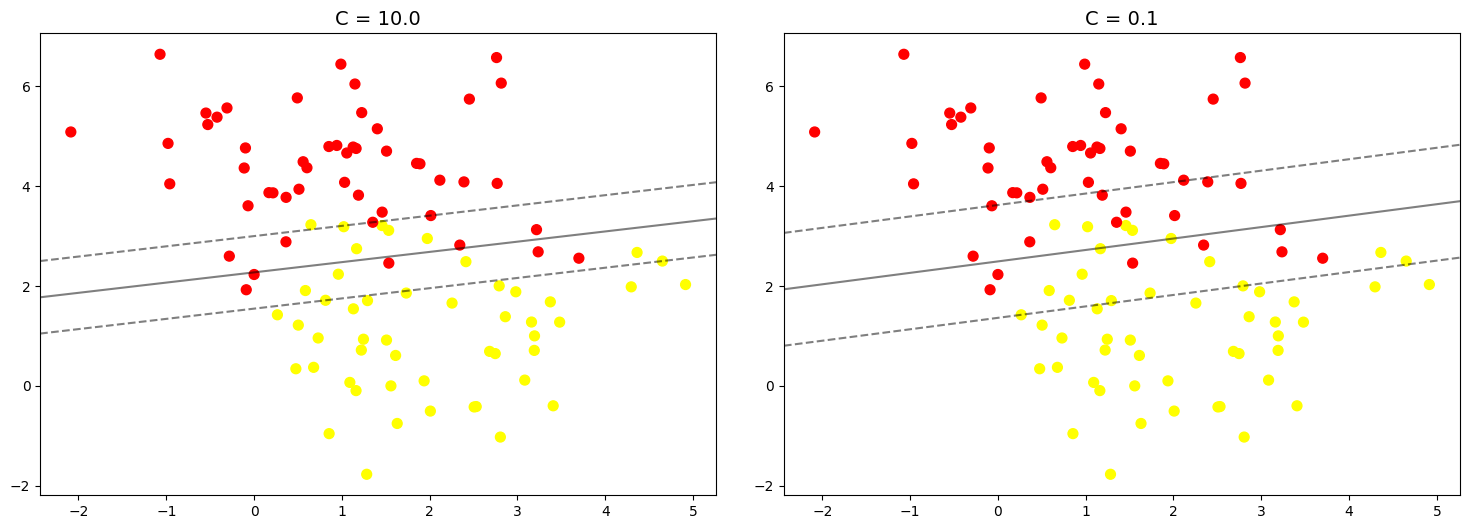

In [6]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Repare que quanto menor o **C** mais pontos de dados estão presentes nas margens

Voltaremos a falar sobre **Otimização de Hiperparametros** mais a frente.

# Página 8
## Target Label e Feature Engineering ##

A engenharia de feature é usada para usar/criar variáveis explicativas que ajudam a prover mais informações ao modelo, para que possamos ter uma melhor previsão, reduzir necessidade computacional e melhorar a interpretabilidade dos resultados.

Para uma feature ser útil, é necessário que a mesma tenha uma relação com a variável **Target** que é justamente o que o modelo está tentando prever.

**Exemplo Conceitual de Feature Engineering: Previsão do Desempenho Escolar**

Imagine que você está desenvolvendo um modelo para prever se alunos irão passar ao final do ano letivo (**Target Label**, 1 se irá passar e 0 se não for passar). Você possui dados como:

- **Horas de estudo diárias**
- **Frequência às aulas**
- **Participação em atividades extracurriculares**
- **Distância de casa até a escola**
- **Uso de tecnologia em sala de aula**
- **Ambiente familiar**
  
Para melhorar o desempenho do seu modelo, você pode criar novas features que capturam melhor os fatores que influenciam o desempenho acadêmico. Por exemplo:

- **Total de horas de estudo semanais**: Multiplicar as horas de estudo diárias por 7 para obter uma visão semanal.
- **Índice de envolvimento escolar**: Combinar a frequência às aulas com a participação em atividades extracurriculares para medir o nível de engajamento do aluno.
- **Tempo de deslocamento diário**: Calcular o tempo gasto no trajeto casa-escola-casa, considerando a distância e o meio de transporte, o que pode afetar a disposição do aluno.
- **Suporte educacional em casa**: Criar uma variável que reflete o ambiente familiar, como disponibilidade de um local adequado para estudar ou apoio dos pais.
- **Uso efetivo da tecnologia**: Avaliar não apenas o uso da tecnologia em sala de aula, mas também como ela é utilizada para fins educacionais em casa.
  
Essas novas features têm uma relação direta com o desempenho escolar (**Target**) e podem ajudar o modelo a identificar padrões mais profundos que influenciam os resultados acadêmicos dos alunos.


# Página 9
## Caso Prático ##

Suponha que você é um administrador de uma companhia de transporte marítimo que deseja melhorar as medidas de segurança para futuros passageiros. Anteriormente, você coletava informações detalhadas sobre as condições dos passageiros durante viagens passadas, mas notou que alguns dados cruciais, como a experiência prévia em situações de emergência, não eram confiáveis ou estavam indisponíveis.

Por isso, você decidiu prever a sobrevivência dos passageiros em caso de desastre marítimo utilizando informações como idade, gênero, classe do ticket e outras características disponíveis no momento da reserva. Para isso, você possui a base de dados histórica do naufrágio do Titanic, que contém essas informações e os resultados de sobrevivência.

O que poderia ser feito? Desenvolver um modelo de Machine Learning utilizando o conjunto de dados do Titanic para prever a sobrevivência dos novos passageiros e, assim, implementar medidas de segurança mais eficazes e personalizadas.

## Data Dictionary - Caso Prático ##
**Variable Definition	Key**

- survival:	0 = No, 1 = Yes
- pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex:	Sex	
- Age:	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket: Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

Variable Notes

pclass: A proxy for socio-economic status (SES):
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...:
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

train = pd.read_csv("C:\\Users\\Sergi\\OneDrive\\Documentos\\AulaMachineLearning\\train.csv", sep =",", decimal=".")
test = pd.read_csv("C:\\Users\\Sergi\\OneDrive\\Documentos\\AulaMachineLearning\\test.csv", sep = ",", decimal = ".")
print("Train Data")
(train.head(3))

Train Data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print("Test Data")
(test.head(3))

Test Data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [68]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Criando um Modelo Básico

Acurácia no Conjunto de Treinamento (Overfitting): 0.82
Acurácia no Conjunto de Teste (Overfitting): 0.74


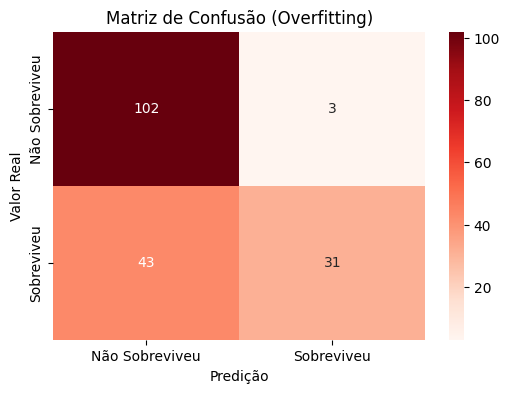

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar colunas relevantes para overfitting
overfitting_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "PassengerId", "Name", "Ticket", "Age", "Fare"]
df_over = train.copy()
# Preenchendo valores nulos no conjunto de dados
df_over["Age"] = df_over["Age"].fillna(df_over["Age"].median())  # Preencher idade com mediana
df_over["Cabin"] = df_over["Cabin"].fillna("Unknown")  # Preencher valores de cabine com "Unknown"

# Codificando as colunas categóricas
le = LabelEncoder()
df_over["Sex"] = le.fit_transform(df_over["Sex"])
df_over["Embarked"] = le.fit_transform(df_over["Embarked"])
df_over["Name"] = le.fit_transform(df_over["Name"])
df_over["Ticket"] = le.fit_transform(df_over["Ticket"])

# Criar X e y
X_overfit = df_over[overfitting_features]
y = df_over["Survived"]

# Divisão dos dados em treino e teste
X_train_overfit, X_test_overfit, y_train_overfit, y_test_overfit = train_test_split(
    X_overfit, y, test_size=0.2, random_state=42
)

# Padronização das features
scaler = StandardScaler()
X_train_overfit_scaled = scaler.fit_transform(X_train_overfit)
X_test_overfit_scaled = scaler.transform(X_test_overfit)

# Criar modelo com overfitting
svc_overfit = SVC(kernel="poly", degree=5, random_state=42)  # Kernel polinomial com grau alto
svc_overfit.fit(X_train_overfit_scaled, y_train_overfit)

# Avaliação no conjunto de teste
y_pred_overfit = svc_overfit.predict(X_test_overfit_scaled)
accuracy_overfit = accuracy_score(y_test_overfit, y_pred_overfit)
print(f"Acurácia no Conjunto de Treinamento (Overfitting): {svc_overfit.score(X_train_overfit_scaled, y_train_overfit):.2f}")
print(f"Acurácia no Conjunto de Teste (Overfitting): {accuracy_overfit:.2f}")

# Matriz de Confusão
conf_matrix_overfit = confusion_matrix(y_test_overfit, y_pred_overfit)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_overfit, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.title('Matriz de Confusão (Overfitting)')
plt.show()

# Página 10
## Overfitting 

Como podemos ver pelos resultados acima, o modelo apresenta um leve overfitting. Overfitting ocorre quando o modelo performa bem nos dados de treinamento, mas tem um desempenho bem inferior nos dados de teste. Isso acontece devido a dois fatores principais:

- **Alta complexidade na escolha dos Hiperparametro**: Quanto mais específico o modelo for configurado através dos hiperparâmetros, maior a chance de ele se ajustar demais aos dados de treinamento. Isso resulta em maior erro e menos previsões corretas nos dados de teste, mesmo que o modelo consiga capturar bem os padrões dos dados de treinamento. As relações aprendidas podem não generalizar bem para novos dados, já que o modelo pode ter capturado ruídos específicos do conjunto de treinamento.

- **Muitas variáveis pouco explicativas**:  Quando o modelo inclui muitas variáveis que não contribuem significativamente para a previsão, ele pode criar relações empiricamente quase inexistentes entre essas features e o alvo. No conjunto de treinamento, isso pode elevar o score, pois o modelo se aproveita dessas relações que estão de fato presentes nessa amostra de dados. Contudo, como os dados de teste é outra amostra de dados, essas relações não se mantêm, o que resulta em queda na acurácia.

**Observação Adicional**: As vezes se faz necessário o Balanceamento de Classes, para evitar que o modelo favoreça uma em relação a outra. Por exemplo, se houevr mais classe "1" do que "0", mas não abordaremos esse tema. Mas algumas das técnicas de ajuste de Balanceamento mais usadas são:

- **Oversampling**: Duplica ou cria exemplos artificias da classe minoritária.
- **Undersampling**: Remove observações da classe majoritária.

Não iremos abordar esses conceitos pois assim como as Árvores de Decisão, o modelo SVM permite ajustar os pesos das classes para dar mais importância à classe minoritária através de um simples parâmetro: 
**class_wieght**


Acurácia no Conjunto de Treinamento (Underfitting): 0.38
Acurácia no Conjunto de Teste (Underfitting): 0.41


c:\Users\Sergi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


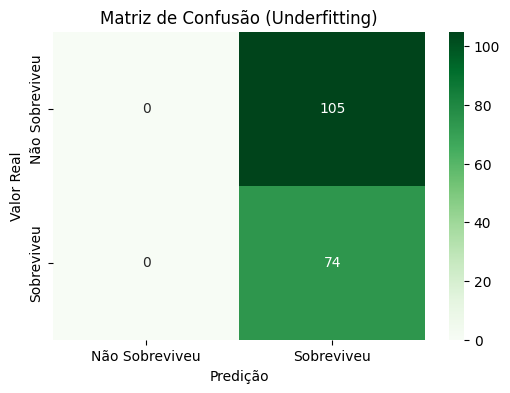

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas uma feature
df_under = train.copy()
underfitting_features = ["Pclass"]  # Usar apenas uma feature para simplificar demais
X_underfit = df_under[underfitting_features]
y = df_under["Survived"]

# Divisão dos dados
X_train_underfit, X_test_underfit, y_train_underfit, y_test_underfit = train_test_split(
    X_underfit, y, test_size=0.2, random_state=42
)

# Modelo com kernel linear simples e parâmetros para limitar a complexidade
svc_underfit = SVC(kernel="linear", C=1000, random_state=42, max_iter=10)  # Parâmetros simplificam o modelo
svc_underfit.fit(X_train_underfit, y_train_underfit)

# Avaliação
y_pred_underfit = svc_underfit.predict(X_test_underfit)

accuracy_underfit = accuracy_score(y_test_underfit, y_pred_underfit)
print(f"Acurácia no Conjunto de Treinamento (Underfitting): {svc_underfit.score(X_train_underfit, y_train_underfit):.2f}")
print(f"Acurácia no Conjunto de Teste (Underfitting): {accuracy_underfit:.2f}")

# Matriz de Confusão
conf_matrix_underfit = confusion_matrix(y_test_underfit, y_pred_underfit)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_underfit, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.title('Matriz de Confusão (Underfitting)')
plt.show()

## Underfitting

Já o Modelo acima apresenta um claro underfitting, que ocorre quando modelo não generaliza bem nem nos dados de treino e nem nos dados de teste, pelos seguintes fatores:

- **Escolha Inadequase do Kernel**: Nos capítulos anterior vimos que o SVM utiliza diferentes tipos de kernels, se o kernel escolhido for muito simples (como o linear) para o complexidade dos dados, o modelo pode não caputar os padrões necessários.

- **Parâmetro de Regularização (C) Muito Alto**: Como vimos, o Parâmetro C controla o trade-off entre maximizar a margem e minimizar o erro de classificação. Um valor muito alto pode fazer com que o modelo se concentre excessivamente em minimizar os erros de treinamento, mas na verdade, no underfitting, geralmente um C **muito baixo** faz o oposto: mais erros de classificação no treinamento para aumentar a margem, simplificando de mais o modelo.

- **Dados de Treinamento Insuficientes ou Não Explicativos**: Por vezes o mais importante, mesmo com um SVM poderoso, se os dados de treinamento não forem suficientes ou não representarem bem a variabilidade dos dados reais, o modelo pode não aprender padrões relevantes, resultando em desempenho ruim tanto no treino quanto no teste.


## Modelo Relativamente Equilíbrado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int32
 2   SibSp     891 non-null    int64
 3   Parch     891 non-null    int64
 4   Embarked  891 non-null    int32
dtypes: int32(2), int64(3)
memory usage: 28.0 KB
None
Acurácia Média no conjunte de Treinamento: 0.80
Acurácia no Conjunto de Teste: 0.79
Matriz de Confusão:


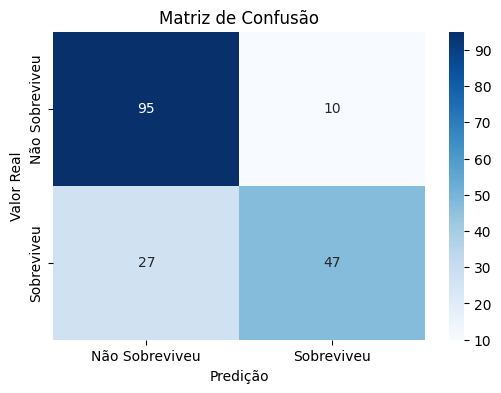

Relatório de Classificação:
                precision    recall  f1-score   support

Não Sobreviveu       0.78      0.90      0.84       105
    Sobreviveu       0.82      0.64      0.72        74

      accuracy                           0.79       179
     macro avg       0.80      0.77      0.78       179
  weighted avg       0.80      0.79      0.79       179



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

le = LabelEncoder()
df_eq = train
#df = train.drop(columns = ['PassengerId', 'Name', 'Ticket'])
# Encoding
df_eq["Sex"] = le.fit_transform(df_eq["Sex"])
df_eq["Embarked"] = le.fit_transform(df_eq["Embarked"])
df_eq["Name"] = le.fit_transform(df_eq["Name"])
df_eq["Ticket"] = le.fit_transform(df_eq["Ticket"])
# Target - Variável a qual queremos prever, comunmente armazenada na variável "y"
y = df_eq["Survived"]
# Features iniciais do Modelo
simples_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
# Input Data contendo as features sem Target, normalmente armazenada na variável X
X = df_eq[simples_features]
print(X.info())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42)

# Padronização de todas as Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo SVM
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

# Fazer Previsões no Conjunto de Treinamento
scores = cross_val_score(svc, X_train_scaled, y_train, cv=10)

# Fazer Previsões no Conjunto de Teste
y_pred = svc.predict(X_test_scaled)


# Calcular Acurácia
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Acurácia Média no conjunte de Treinamento: {scores.mean():.2f}")
print(f"Acurácia no Conjunto de Teste: {accuracy_test:.2f}")

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
class_report = classification_report(y_test, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu'])
print("Relatório de Classificação:")
print(class_report)

# Página 11
# Feature Engeniering
Para melhorar o desempenho do modelo, podemos criar novas features ou transformar as existentes:

- **Title**: Extrair o título (Sr., Sra., Srta., etc.) a partir do nome para capturar informações sobre status social ou estado civil.

- **FamilySize**: Combinar as features SibSp e Parch para criar uma nova variável que representa o tamanho total da família a bordo.

- **IsAlone**: Criar uma variável binária que indica se o passageiro estava viajando sozinho.

- **AgeGroup**: Categorizar a idade em grupos (criança, adolescente, adulto, idoso) para capturar relações não lineares com a sobrevivência.

- **FareBand**: Categorizar a tarifa paga em faixas para reduzir o impacto de valores extremos e capturar padrões.

- **Deck**: Extrair a letra do deck a partir da cabine para possivelmente relacionar a localização no navio com a probabilidade de sobrevivência

- **Porto de Embarque**: Transformar a variável categórica Embarked em dummy variables (one-hot encoding).

In [218]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 69.7+ KB


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

train = pd.read_csv("C:\\Users\\Sergi\\OneDrive\\Documentos\\AulaMachineLearning\\train.csv", sep =",", decimal=".")
test = pd.read_csv("C:\\Users\\Sergi\\OneDrive\\Documentos\\AulaMachineLearning\\test.csv", sep = ",", decimal = ".")

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

def preprocess_features(df, dataset_type="train"):
    """
    Processa e transforma os dados do DataFrame para preparação do modelo.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados a serem processados.
    - dataset_type (str): Indica se o DataFrame é de treino ou teste. Padrão é "train".

    Retorna:
    - df (pd.DataFrame): DataFrame com as novas features processadas.
    - feature_names (list): Lista com os nomes das features utilizadas.
    """
    
    # 1. Extrair o título do nome
    df['Name'] = df['Name'].fillna('Unknown')
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
    
    # Mapeamento dos títulos para categorias mais simples
    title_mapping = {
        'Miss': 'Miss',
        'Mlle': 'Miss',
        'Dona': 'Miss',
        'Mrs': 'Mrs',
        'Lady': 'Mrs',
        'the Countess': 'Mrs',
        'Mme': 'Mrs',
        'Ms': 'Ms',
        # Adicione outros títulos se necessário
    }
    df['Name'] = df['Name'].astype(str)
    df['Title'] = df['Title'].map(title_mapping).fillna('Other')
    
    # Codificar os títulos
    df['Title'] = label_encoder.fit_transform(df['Title'])
    
    # 2. Calcular o tamanho da família
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 para incluir o próprio passageiro
    
    # 3. Indicar se o passageiro está sozinho
    df['IsAlone'] = 1  # Assume que está sozinho inicialmente
    df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0  # Se família > 1, não está sozinho
    
    # 4. Tratar a idade
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Preencher valores faltantes com a mediana
    # Criar grupos etários
    age_labels = ['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
    df['AgeGroup'] = pd.cut(df['Age'], bins=5, labels=age_labels)
    
    # Codificar os grupos etários
    df = pd.get_dummies(df, columns=["AgeGroup"], prefix='AgeGroup')
    
    # 5. Codificar o sexo
    df["Sex"] = label_encoder.fit_transform(df["Sex"])
    
    # 6. Tratar a tarifa
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())  # Preencher valores faltantes com a mediana
    df['FareBand'] = pd.cut(df['Fare'], 3, labels=['Low', 'Medium', 'High'])
    df['FareBand_encoded'] = label_encoder.fit_transform(df['FareBand'])
    
    # 7. Tratar a localização no navio
    df['Cabin'] = df['Cabin'].fillna('Unknown')  # Preencher valores faltantes
    df['Deck'] = df['Cabin'].str[0]  # Extrair a letra do convés
    df = pd.get_dummies(df, columns=['Deck'], prefix='Deck')
    
    # 8. Codificar o porto de embarque
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
    
    # 9. Remover colunas que não serão usadas
    cols_to_drop = ["Ticket", "Fare", "FareBand", "Name", "Cabin"]

    #df.drop(columns=cols_to_drop, inplace=True)
    
    # Definir a lista de features que serão usadas no modelo
    features = [
        'Pclass', 'Sex', 'SibSp', 'Parch', 'Title', "Age",
        'FamilySize', 'IsAlone', 'FareBand_encoded',
        'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
        'Embarked_C', 'Embarked_Q', 'Embarked_S',
        'AgeGroup_Child', 'AgeGroup_Young Adult', 'AgeGroup_Adult',
        'AgeGroup_Middle-aged', 'AgeGroup_Senior'
    ]

    return df, features

# Exemplo de uso:
# Supondo que 'train' e 'test' sejam seus DataFrames de treino e teste

# Processar dados de treino
X, features = preprocess_features(train, "train")

# Processar dados de teste
y, features = preprocess_features(test, "test")

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    int64   
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    int32   
 5   Age                   891 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  891 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Title                 891 non-null    int32   
 12  FamilySize            891 non-null    int64   
 13  IsAlone               891 non-null    int64   
 14  AgeGroup_Child        891 non-null    bool    
 15  AgeGro

In [6]:
X.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,True,False,False,False,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,True,False,False,True


In [7]:
y.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Unknown,...,False,False,False,False,False,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Unknown,...,False,False,False,False,False,False,True,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Unknown,...,False,False,False,False,False,False,True,False,True,False


# Página 12
## Encoding de Features Categóricas

Como podemos ver na função **Features** e nos dados tratados acima, algumas features foram transformadas através duma técnica chamada **Encoding**, que consiste na transformação de uma variável **categórica** numa variável **númerica** ou **booleana**. Isso é necessário pois a maioria dos modelos não consegue lidar diretamente com variáveis categóricas.

**Alguns tipos de Encoding e Usos**:

- **Label Encoding**: Cada categoria única é mapeada para um número inteiro. As categorias são ordenadas alfabeticamente ou de acordo com a ordem padrão do dataset, normalmente é usada quando há um ordenamento padrão nos dados, como "low", "medium" e "high" ou quando há poucas categorias ex: "male" e "female", como nos dados do titanic da feature "Sex". Pode não ser recomendada para categorias que não possuem relação ordinal.

- **One-Hot Encoding**: Cria colunas binárias (0 ou 1) para cada categoria, é recomendada quando as variáveis categóricas não têm ordem e quando o número de categorias é pequeno. Porém, não é recomendada quando a variáveis tem muitas categorias únicas como por exemplo, no dataset do titanic, temos a variável "Ticket", se fossemos usar esse tipo de encoding nessa feature, criariamos muitas colunas e isso dificultaria o treinamento do modelo.

- **Frequency Encoding**: Substitui cada categoria pela frequência com que ela aparece no Dataset, assim conseguimos capturar a importância de cada categoria com base na frequência relativa mas não conseguimos capturar as relações diretas entre a categoria e a Target.

- **Ordinal Encoding**: Similiar ao Label Encoding, mas permite especificar uma ordem explícita entre as categorias, boa para variáveis como níveis de escolaridade ou categorias de risco.



In [224]:
print(f"Features:{features}")

Features:['Pclass', 'Sex', 'SibSp', 'Parch', 'Title', 'FamilySize', 'IsAlone', 'FareBand_encoded', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'AgeGroup_Child', 'AgeGroup_Young Adult', 'AgeGroup_Adult', 'AgeGroup_Middle-aged', 'AgeGroup_Senior']


# Página 13
## Data Splitting ##

A divisão de dados é uma técnica fundamental não só para avaliar o desempenho do modelo mas também como garantir uma melhor generalização para dados não vistos. A separação ocorre da seguinte forma:

1. **Conjunto de Treinamento (Training Set - Treinamento/fit):** Usado para treinar o modelo
2. **Conjunto de Teste  (Test Set - Validação):** Usado para avaliar o desempenho do modelo em dados não vistos no conjunto de treino
3. O Test_set previamente separado será usado para um **backtest**, dados que não foram vistos nem no conjunto de treino e nem no de validação

In [4]:
# Target - Variável a qual queremos prever, comunmente armazenada na variável "y"
y = X["Survived"]
# Input Data contendo as features sem Target, normalmente armazenada na variável X
X = X[features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify=y)

# test_size = 0.2: Reserva 20% dos dados para teste
# random_state = 42: Garante reprodutibilidade dos resultados
# stratify = y: Mantém a proporção original das classes nos conjuntos de treinamento e teste

## Normalização (Scaling) ##

O Modelo SVM Classifier é sensível à escala dos dados, por isso se faz necessária a normalização ou padronização das features numéricas para que estajam na mesma escala. Isso acontence pois o SVM busca encontrar o hiperplano ótimo que separa as classes, maximando a margem entre elas.

Se as features tiverem escalas diferentes, aquelas com valores maiores podem dominar o cálculo das distâncias e influenciar indevidamente o modelo.

Algumas da Normalizações mais usadas e conhecidas é a Padronização e o MinMax.

**Standard Scaling**:
$$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$

- Transforma os dados para que tenham média 0 e desvio padrão 1. Isso é feito subtraindo a média e dividindo pelo desvio padrão para cada observação de determinada feature.
- Útil quando a feature segue uma distribuição normal
- Reduz o impacto de outlier mas ainda os considera

**MinMax:**
$$x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$$

- Reescala os dados para que fiquem dentro de um intervalo específico, geralmente entre 0 e 1, utilizando os valores máximo e minímos de determinada feature.
- Preserva a distribuição original dos dados
- Pode ser fortemente afetado por outliers, pois utiliza valores máximo e mínimo

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train_scaled)



array([[ 0.82956755,  0.74242727, -0.46508428, ..., -0.53186735,
        -0.28647316, -0.11935248],
       [-0.37094484,  0.74242727, -0.46508428, ..., -0.53186735,
        -0.28647316, -0.11935248],
       [-1.57145722,  0.74242727, -0.46508428, ..., -0.53186735,
        -0.28647316, -0.11935248],
       ...,
       [ 0.82956755, -1.34693328,  0.47833454, ...,  1.88016804,
        -0.28647316, -0.11935248],
       [-1.57145722,  0.74242727, -0.46508428, ...,  1.88016804,
        -0.28647316, -0.11935248],
       [-1.57145722,  0.74242727, -0.46508428, ..., -0.53186735,
        -0.28647316, -0.11935248]])

# Página 14
## Otimização de Hiperparametros

Já abordados anteriormente, hiperparâmetros são importantes pois melhoram a performance do modelo ao otimizar o processo de treino. No entanto, hiperparâmetros mal otimizados podem resultar em modelos underfitted ou overfitted. Veremos uma maneira relativamente menos complexa de otimizá-los, mesmo que você não esteja muito familiarizado com o que cada um deles faz. Existem métodos de escolha automatizados que utilizaremos a partir de agora.

## Conceito de Espaço de Hiperparâmetros

Primeiramente, vamos aprofundar esse conceito. O Espaço de Hiperparâmetros é o conjunto de possíveis combinações de hiperparâmetros que podem ser usados para treinar o modelo. É um espaço multidimensional, com cada dimensão representando um hiperparâmetro diferente. Por exemplo, no SVM Classifier temos C e Gamma, então o espaço teria 2 dimensões: uma para **C** e outra para **Gamma**. Além disso, cada hiperparâmetro está restrito a uma distribuição de valores que pode assumir, definindo assim seu range.

## Objetivo

Sendo assim, a otimização de hiperparâmetros nada mais é do que procurar a melhor combinação de valores para cada um deles que resulte no melhor resultado/treinameto do modelo, algumas das ténicas empregadas são:

- **Grid Search**: Considerada uma abordagem de "força bruta". Basicamente treina o modelo com todas as combinações possíveis de hiperparâmetros e o escolhe o que teve a melhor performance. É computacionalmente cara.

- **Random Search**: Como o nome sugere, procura combinações de hiperparâmetros de forma randomica, mas mesmo assim produz resultados relativamente parecidos com o Grid Search de forma mais rápida.

- **Bayesian Optimization**: Apesar dos outros dois serem técnicas de Otimização de hiperparâmetros, o Bayesian sim trata a questão como um problema probabilístico. Esse método considera os resultados da última combinação de hiperparâmetros e seleciona a próxima combinação com base numa função de probabilidade que irá, teoricamente, resultar numa performance melhor. Essa função pode, por exemplo, tentar minimizar o Erro Médio Quadrado nas iterações subsequentes no espaço de hiperparâmetros.


# Página 15
## State of the Art: Optuna

Usaremos uma das melhores biblioteca atualmente disponível para otimização, Optuna. O Optuna é uma biblioteca de otimização de hiperparâmetros que utiliza técnicas avançadas baseado em **Bayesian Optimization** para encontrar as melhores combinações de forma eficiente e flexível.

- **Busca mais eficiente:** Começa por uma alguns conjuntos amostrais de hiperparametros e avalia suas performances, então cria um modelo para prever quais hiperparametros performariam melhor baseado nos resultados anteriores. Isso permite ao modelo forcas nas areas do **Search Space** mais promissora.

- **Tree-structure Parzen Estimator (TPE):** Ao invés de usar um processo Gaussiano como métodos Bayesianos tradicionais usam, o TPE modela uma "Objective Function" usando duas funções de densidade de probabilidade, uma para o melhor conjunto de hiperparametro e outra para os piores que esse, a seguir, a distribuição dessas amostras é usada para fazer um novo conjuntos que tem uma probabilidade maior de performar melhor

- **Multi-Objective Optimization:** Permite uma otimização que equilibra mais de um objetivo, como por exemplo, balancear o Trade-off entre métricas de avaliação de modelo diferentes, como Precisão (accuracy) e Recall (Falso Positivos, Negativos). Isso é possível pois o algoritmo encontra uma gama de soluções que não são estritamente melhores que umas as outras em todos os objetivos especificados.

**Resumo**

Usando TPE, duas funções de densidade de probabilidade são construidas: l(x) para bons resultados e g(x) para resultados ruins, o algoritimo cria amostras de novos hiperparametros que maximizam a divisão l(x)/g(x).

Através de outros calculos matemáticos, ela garante que as novas amostras sejam retiradas das regiões do **Search Space** que há mais probabilidade de que bons conjuntos de hiperametros sejam encontrados.

[I 2024-11-28 13:22:46,797] A new study created in memory with name: no-name-5ec666d6-1a0d-4e17-a9c5-5b4f8d651a48
C:\Users\Sergi\AppData\Local\Temp\ipykernel_16340\2838367873.py:69: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
C:\Users\Sergi\AppData\Local\Temp\ipykernel_16340\2838367873.py:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  Gamma = trial.suggest_loguniform('Gamma', 1e-4, 1e1)
[I 2024-11-28 13:22:46,799] Trial 0 finished with value: 21.422326337135036 and parameters: {'C': 0.1767016940294795, 'Gamma': 5.669849511478847}. Best is trial 0 with value: 21.422326337135036.
[I 2024-11-28 13:22:46,801] Trial 1 finishe

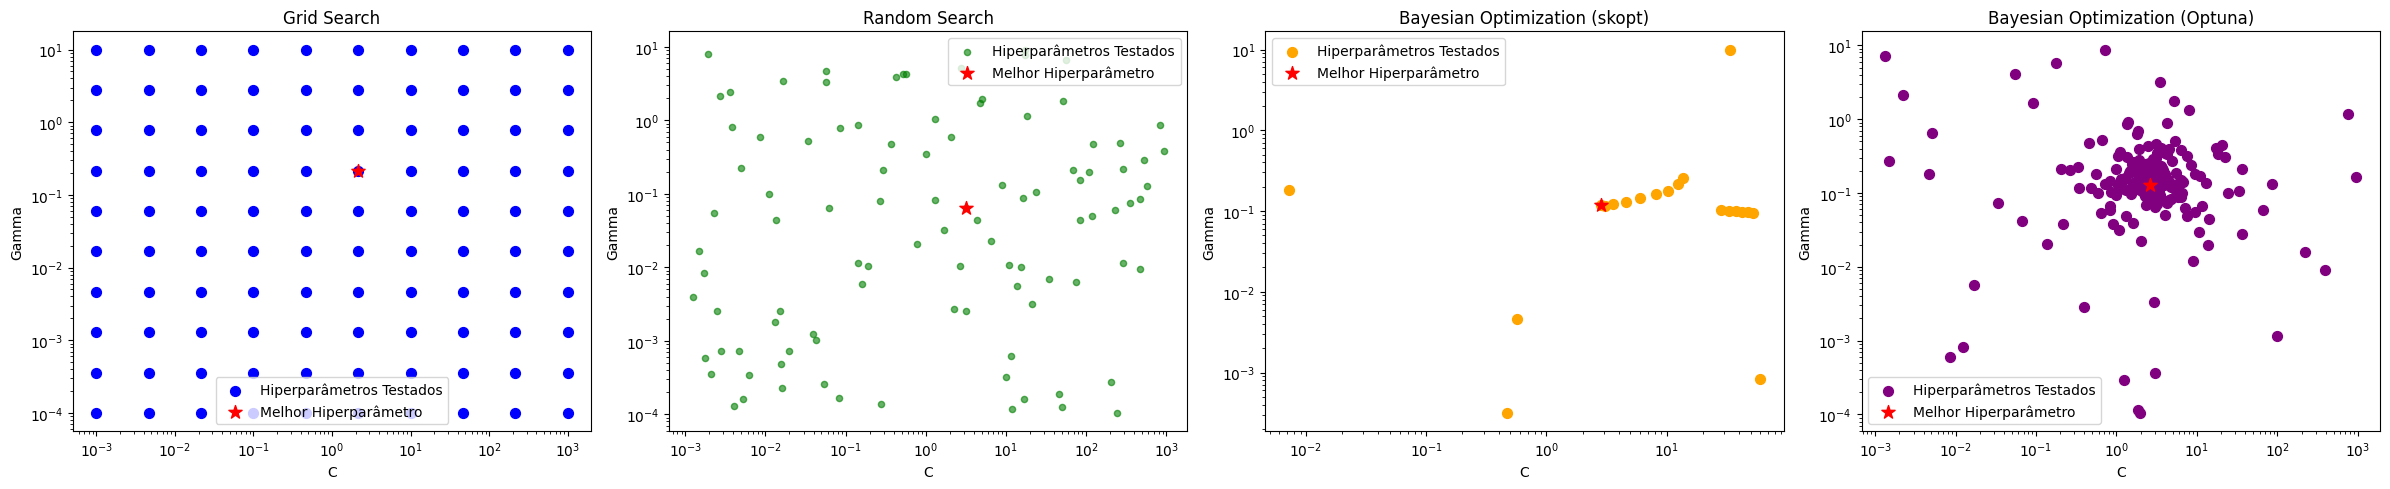

Melhores Hiperparâmetros Encontrados:

1. Grid Search:
  C = 2.1544
  Gamma = 0.2154
  Score (Objective): 0.2702
  Tempo de Execução: 0.00 segundos

2. Random Search:
  C = 3.1944
  Gamma = 0.0633
  Score (Objective): 0.6028
  Tempo de Execução: 0.00 segundos

3. Bayesian Optimization (scikit-optimize):
  C = 2.8428
  Gamma = 0.1182
  Score (Objective): 0.0204
  Tempo de Execução: 4.77 segundos

4. Bayesian Optimization (Optuna):
  C = 2.5739
  Gamma = 0.1295
  Score (Objective): 0.0049
  Tempo de Execução: 1.89 segundos



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize
from skopt.space import Real
import optuna
import random
import time

# Definindo o espaço de hiperparâmetros
C_range = np.logspace(-3, 3, 100)
Gamma_range = np.logspace(-4, 1, 100)

# Função objetivo simulada (por exemplo, acurácia negativa para minimizar)
def objective(params):
    C, Gamma = params
    # Simulando uma função objetivo (substitua com validação real)
    return (np.log(C) - 1)**2 + (np.log(Gamma) + 2)**2

# Grid Search
def grid_search():
    grid_points = []
    step = 10  # Número de pontos em cada dimensão
    C_grid = np.logspace(-3, 3, step)
    Gamma_grid = np.logspace(-4, 1, step)
    for C in C_grid:
        for Gamma in Gamma_grid:
            grid_points.append([C, Gamma])
    grid_points = np.array(grid_points)
    # Avaliar todos os pontos
    grid_scores = np.array([objective(p) for p in grid_points])
    best_idx = grid_scores.argmin()
    best_point = grid_points[best_idx]
    best_score = grid_scores[best_idx]
    return grid_points, best_point, best_score

# Random Search
def random_search(n_points=100):
    random_points = []
    for _ in range(n_points):
        C = 10**random.uniform(-3, 3)
        Gamma = 10**random.uniform(-4, 1)
        random_points.append([C, Gamma])
    random_points = np.array(random_points)
    # Avaliar todos os pontos
    random_scores = np.array([objective(p) for p in random_points])
    best_idx = random_scores.argmin()
    best_point = random_points[best_idx]
    best_score = random_scores[best_idx]
    return random_points, best_point, best_score  # Corrigido aqui

# Bayesian Optimization usando scikit-optimize
def bayesian_optimization_skopt(n_initial=5, n_calls=20):
    space = [Real(1e-3, 1e3, prior='log-uniform', name='C'),
             Real(1e-4, 1e1, prior='log-uniform', name='Gamma')]
    
    start_time = time.time()
    res = gp_minimize(objective, space, n_initial_points=n_initial, n_calls=n_calls, random_state=42)
    end_time = time.time()
    elapsed_time = end_time - start_time

    bayes_points = np.array(res.x_iters)
    bayes_best = res.x
    bayes_best_score = res.fun
    return res, bayes_points, bayes_best, bayes_best_score, elapsed_time

# Bayesian Optimization usando Optuna
def bayesian_optimization_optuna(n_trials=200):
    def optuna_objective(trial):
        C = trial.suggest_loguniform('C', 1e-3, 1e3)
        Gamma = trial.suggest_loguniform('Gamma', 1e-4, 1e1)
        return objective([C, Gamma])
    
    study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
    
    start_time = time.time()
    study.optimize(optuna_objective, n_trials=n_trials)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Extraindo os pontos testados
    optuna_points = np.array([[trial.params['C'], trial.params['Gamma']] for trial in study.trials])
    
    # Melhor ponto
    optuna_best = study.best_params
    optuna_best_score = study.best_value
    return study, optuna_points, optuna_best, optuna_best_score, elapsed_time

# Executando as otimizações
# Grid Search
start_grid = time.time()
grid_points, grid_best, grid_best_score = grid_search()
end_grid = time.time()
grid_time = end_grid - start_grid

# Random Search
start_random = time.time()
random_points, random_best, random_best_score = random_search(n_points=100)
end_random = time.time()
random_time = end_random - start_random

# Bayesian Optimization (scikit-optimize)
bayes_result_skopt, bayes_points_skopt, bayes_best_skopt, bayes_best_score_skopt, bayes_time_skopt = bayesian_optimization_skopt(n_initial=5, n_calls=20)

# Bayesian Optimization (Optuna)
bayes_result_optuna, bayes_points_optuna, bayes_best_optuna, bayes_best_score_optuna, bayes_time_optuna = bayesian_optimization_optuna(n_trials=200)

# Plotando
plt.figure(figsize=(24, 5))

# Grid Search
plt.subplot(1, 4, 1)
plt.scatter(grid_points[:,0], grid_points[:,1], color='blue', s=50, label='Hiperparâmetros Testados')
plt.scatter(grid_best[0], grid_best[1], color='red', s=100, marker='*', label='Melhor Hiperparâmetro')
plt.xscale('log')
plt.yscale('log')
plt.title('Grid Search')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.legend()

# Random Search
plt.subplot(1, 4, 2)
plt.scatter(random_points[:,0], random_points[:,1], color='green', alpha=0.6, s=20, label='Hiperparâmetros Testados')
plt.scatter(random_best[0], random_best[1], color='red', s=100, marker='*', label='Melhor Hiperparâmetro')
plt.xscale('log')
plt.yscale('log')
plt.title('Random Search')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.legend()

# Bayesian Optimization (scikit-optimize)
plt.subplot(1, 4, 3)
plt.scatter(bayes_points_skopt[:,0], bayes_points_skopt[:,1], color='orange', s=50, label='Hiperparâmetros Testados')
plt.scatter(bayes_best_skopt[0], bayes_best_skopt[1], color='red', s=100, marker='*', label='Melhor Hiperparâmetro')
plt.xscale('log')
plt.yscale('log')
plt.title('Bayesian Optimization (skopt)')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.legend()

# Bayesian Optimization (Optuna)
plt.subplot(1, 4, 4)
plt.scatter(bayes_points_optuna[:,0], bayes_points_optuna[:,1], color='purple', s=50, label='Hiperparâmetros Testados')
plt.scatter(bayes_best_optuna['C'], bayes_best_optuna['Gamma'], color='red', s=100, marker='*', label='Melhor Hiperparâmetro')
plt.xscale('log')
plt.yscale('log')
plt.title('Bayesian Optimization (Optuna)')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.legend()

plt.tight_layout()
plt.show()

# Exibindo os melhores hiperparâmetros e tempos de execução
print("Melhores Hiperparâmetros Encontrados:\n")

print("1. Grid Search:")
print(f"  C = {grid_best[0]:.4f}")
print(f"  Gamma = {grid_best[1]:.4f}")
print(f"  Score (Objective): {grid_best_score:.4f}")
print(f"  Tempo de Execução: {grid_time:.2f} segundos\n")

print("2. Random Search:")
print(f"  C = {random_best[0]:.4f}")
print(f"  Gamma = {random_best[1]:.4f}")
print(f"  Score (Objective): {random_best_score:.4f}")
print(f"  Tempo de Execução: {random_time:.2f} segundos\n")

print("3. Bayesian Optimization (scikit-optimize):")
print(f"  C = {bayes_best_skopt[0]:.4f}")
print(f"  Gamma = {bayes_best_skopt[1]:.4f}")
print(f"  Score (Objective): {bayes_best_score_skopt:.4f}")
print(f"  Tempo de Execução: {bayes_time_skopt:.2f} segundos\n")

print("4. Bayesian Optimization (Optuna):")
print(f"  C = {bayes_best_optuna['C']:.4f}")
print(f"  Gamma = {bayes_best_optuna['Gamma']:.4f}")
print(f"  Score (Objective): {bayes_best_score_optuna:.4f}")
print(f"  Tempo de Execução: {bayes_time_optuna:.2f} segundos\n")


# Página 16
# Métricas de Avaliação do Modelo

As métricas de avaliação de modelos diferem para modelos de **Regressão** e **Classificação**.

### Regressão

Para modelos de regressão, que preveem valores contínuos, as métricas mais comuns são:

- **Mean Absolute Error (MAE):**
  
  Mede a média das diferenças absolutas entre as previsões e os valores reais. É fácil de interpretar e robusto a outliers.
  
  $$
  MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$

- **Mean Squared Error (MSE):**
  
  Calcula a média dos quadrados das diferenças entre as previsões e os valores reais. Penaliza erros maiores de forma mais severa que o MAE.
  
  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **Root Mean Squared Error (RMSE):**
  
  É a raiz quadrada do MSE, trazendo a métrica de volta à mesma unidade dos dados originais, facilitando a interpretação.
  
  $$
  RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
  $$

- **R-squared (R²):**
  
  Indica a proporção da variabilidade dos dados que é explicada pelo modelo. Valores próximos de 1 indicam um bom ajuste.
  
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \overline{y})^2}
  $$

### Classificação

Para modelos de classificação, que atribuem categorias a entradas, as métricas mais comuns são:

- **Accuracy:**
  
  Mede a proporção de previsões corretas em relação ao total de previsões.
  
  $$
  \text{Accuracy} = \frac{\text{Número de Previsões Corretas}}{\text{Total de Previsões}}
  $$

- **Precision:**
  
  Indica a proporção de verdadeiros positivos em relação ao total de positivos previstos. É útil quando o custo de falsos positivos é alto.
  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall (Sensitivity):**
  
  Mede a proporção de verdadeiros positivos em relação ao total de positivos reais. É importante quando o custo de falsos negativos é alto.
  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-Score:**
  
  É a média harmônica entre precision e recall, proporcionando um equilíbrio entre ambas.
  
  $$
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **Area Under the ROC Curve (AUC-ROC):**
  
  Avalia a capacidade do modelo em distinguir entre classes, plotando a taxa de verdadeiros positivos contra a taxa de falsos positivos.

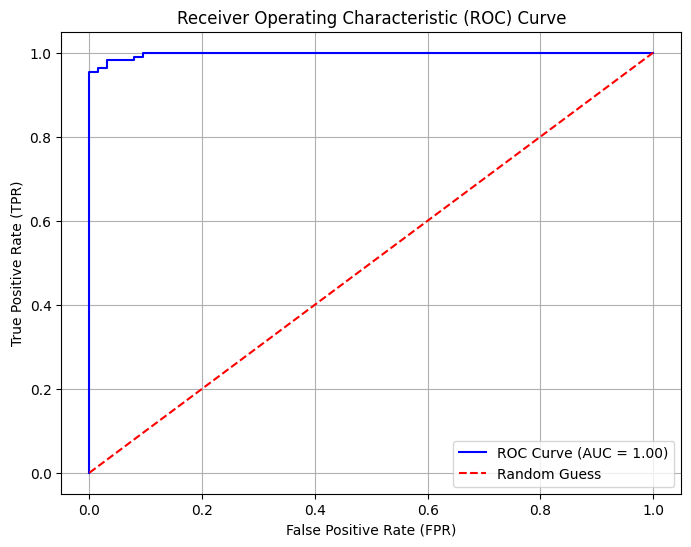

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Carregar o conjunto de dados
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar e treinar o modelo
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Obter as probabilidades previstas para a classe positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
auc_score = roc_auc_score(y_test, y_probs)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


A curva ROC exibida no gráfico avalia o desempenho de um modelo de classificação binária

O eixo X representa a Taxa de Falsos Positivos (FPR - False Positive Rate). Quanto menor, melhor, pois significa que o modelo comete menos erros ao prever exemplos negativos como positivos.
O eixo Y representa a Taxa de Verdadeiros Positivos (TPR - True Positive Rate) ou Recall. Quanto maior, melhor, pois indica que o modelo consegue identificar corretamente exemplos positivos.
Curva ROC (linha azul):

A curva azul mostra a relação entre a TPR e a FPR para diferentes limiares de decisão. Quanto mais próximo essa curva está do canto superior esquerdo, melhor o modelo.
Linha diagonal (linha vermelha):

Essa linha representa uma adivinhação aleatória (Random Guess). Um modelo com desempenho equivalente a essa linha não seria útil, pois suas previsões seriam aleatórias.
AUC (Área Sob a Curva):

**Desempenho excelente:** Uma AUC igual a 1.00 indica que o modelo é capaz de prever corretamente todas as classes positivas e negativas sem cometer erros.

**Sem falsos positivos ou falsos negativos:** A curva azul atinge a TPR de 1 (ou 100%) antes mesmo de a FPR aumentar, indicando que o modelo não comete erros em nenhuma situação para este conjunto de dados.


- **Confusion Matrix:**
  
  Apresenta uma tabela com os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos, fornecendo uma visão detalhada do desempenho do modelo.
  
  |               | Previsão Positivo | Previsão Negativo |
  |---------------|------------------|------------------|
  | **Real Positivo** | True Positive               | False Negative               |
  | **Real Negativo** | False Positive               | True Negative               |

Essas métricas ajudam a entender diferentes aspectos do desempenho do modelo, permitindo ajustes e melhorias conforme necessário.


# Página 17
# Estruturação Final do Modelo

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

def preprocess_features(df, dataset_type="train"):
    """
    Processa e transforma os dados do DataFrame para preparação do modelo.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados a serem processados.
    - dataset_type (str): Indica se o DataFrame é de treino ou teste. Padrão é "train".

    Retorna:
    - df (pd.DataFrame): DataFrame com as novas features processadas.
    - feature_names (list): Lista com os nomes das features utilizadas.
    """
    
    # 1. Extrair o título do nome
    df['Name'] = df['Name'].fillna('Unknown')
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
    
    # Mapeamento dos títulos para categorias mais simples
    title_mapping = {
        'Miss': 'Miss',
        'Mlle': 'Miss',
        'Dona': 'Miss',
        'Mrs': 'Mrs',
        'Lady': 'Mrs',
        'the Countess': 'Mrs',
        'Mme': 'Mrs',
        'Ms': 'Ms',
        # Adicione outros títulos se necessário
    }
    df['Name'] = df['Name'].astype(str)
    df['Title'] = df['Title'].map(title_mapping).fillna('Other')
    
    # Codificar os títulos
    df['Title'] = label_encoder.fit_transform(df['Title'])
    
    # 2. Calcular o tamanho da família
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 para incluir o próprio passageiro
    
    # 3. Indicar se o passageiro está sozinho
    df['IsAlone'] = 1  # Assume que está sozinho inicialmente
    df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0  # Se família > 1, não está sozinho
    
    # 4. Tratar a idade
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Preencher valores faltantes com a mediana
    # Criar grupos etários
    age_labels = ['Child', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
    df['AgeGroup'] = pd.cut(df['Age'], bins=5, labels=age_labels)
    
    # Codificar os grupos etários
    df = pd.get_dummies(df, columns=["AgeGroup"], prefix='AgeGroup')
    
    # 5. Codificar o sexo
    df["Sex"] = label_encoder.fit_transform(df["Sex"])
    
    # 6. Tratar a tarifa
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())  # Preencher valores faltantes com a mediana
    df['FareBand'] = pd.cut(df['Fare'], 3, labels=['Low', 'Medium', 'High'])
    df['FareBand_encoded'] = label_encoder.fit_transform(df['FareBand'])
    
    # 7. Tratar a localização no navio
    df['Cabin'] = df['Cabin'].fillna('Unknown')  # Preencher valores faltantes
    df['Deck'] = df['Cabin'].str[0]  # Extrair a letra do convés
    df = pd.get_dummies(df, columns=['Deck'], prefix='Deck')
    
    # 8. Codificar o porto de embarque
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
    
    # 9. Remover colunas que não serão usadas
    cols_to_drop = ["Ticket", "Fare", "FareBand", "Name", "Cabin"]

    #df.drop(columns=cols_to_drop, inplace=True)
    
    # Definir a lista de features que serão usadas no modelo
    features = [
        'Pclass', 'Sex', 'SibSp', 'Parch', 'Title', "Age",
        'FamilySize', 'IsAlone', 'FareBand_encoded',
        'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
        'Embarked_C', 'Embarked_Q', 'Embarked_S',
        'AgeGroup_Child', 'AgeGroup_Young Adult', 'AgeGroup_Adult',
        'AgeGroup_Middle-aged', 'AgeGroup_Senior'
    ]

    return df, features

# Exemplo de uso:
# Supondo que 'train' e 'test' sejam seus DataFrames de treino e teste

# Processar dados de treino
X, features = preprocess_features(train, "train")

# Processar dados de teste
y, features = preprocess_features(test, "test")
train = pd.read_csv("C:\\Users\\Sergi\\OneDrive\\Documentos\\AulaMachineLearning\\train.csv", sep =",", decimal=".")
test = pd.read_csv("C:\\Users\\Sergi\\OneDrive\\Documentos\\AulaMachineLearning\\test.csv", sep = ",", decimal = ".")
# Processar dados de treino
X, features = preprocess_features(train, "train")

# Processar dados de teste
y, features = preprocess_features(test, "test")
# Target - Variável a qual queremos prever, comunmente armazenada na variável "y"
y = X["Survived"]
# Input Data contendo as features sem Target, normalmente armazenada na variável X
X = X[features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42)

# test_size = 0.2: Reserva 20% dos dados para teste
# random_state = 42: Garante reprodutibilidade dos resultados
# stratify = y: Mantém a proporção original das classes nos conjuntos de treinamento e teste

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply scaling
scaler = StandardScaler()
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

(X_train.tail(3))



,Pclass,Sex,SibSp,Parch,Title,Age,FamilySize,IsAlone,FareBand_encoded,Deck_A,...,Deck_G,Deck_T,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Middle-aged,AgeGroup_Senior
860,0.813034,0.724310,1.230569,-0.479342,0.702416,0.907456,0.634859,-1.231219,-0.100487,False,...,False,False,False,False,True,False,False,True,False,False
435,-1.614136,-1.380624,0.379923,2.048742,-1.671573,-1.169653,1.229621,-1.231219,-0.100487,False,...,False,False,False,False,True,True,False,False,False,False
102,-1.614136,0.724310,-0.470722,0.784700,0.702416,-0.631144,0.040096,-1.231219,-0.100487,False,...,False,False,False,False,True,False,True,False,False,False


In [ ]:
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit, KFold, ShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import optuna
from optuna.samplers import TPESampler
from sklearn.preprocessing import StandardScaler


def objective(trial):
    # Define o espaço de busca dos hiperparâmetros
    C = trial.suggest_float('C', 1e-2, 1e2, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 12)
    else:
        degree = 3  # Valor padrão quando se é usado o Kernel "Poly"

    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    coef0 = trial.suggest_float('coef0', -1.5, 1.5) if kernel in ['poly', 'sigmoid'] else 0.0
    shrinking = trial.suggest_categorical('shrinking', [True, False])
    tol = trial.suggest_float('tol', 1e-6, 1e-2, log=True)  
    cache_size = trial.suggest_int('cache_size', 100, 10000)
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])
    max_iter = trial.suggest_int('max_iter', 100, 50000)
    random_state = 42
    decision_function_shape = trial.suggest_categorical('decision_function_shape', ['ovr', 'ovo'])
    break_ties = trial.suggest_categorical('break_ties', [False])

    # Criando um pipeline para o modelo
    pipeline = Pipeline([
        # ('scaler', StandardScaler()),  # Comentado pois os dados já estão escalados, 
#                                         # mas escala-los no pipeline é boa prática
        ('svc', SVC(
            C=C,
            kernel=kernel,
            degree=degree,
            gamma=gamma,
            coef0=coef0,
            shrinking=shrinking,
            probability=False,  # Se TRUE é retornado qual a probabilidade de o ponto estar em determinada classe, invés da classe
            tol=tol,
            cache_size=cache_size,
            class_weight=class_weight,
            max_iter=max_iter,
            random_state=random_state,
            decision_function_shape=decision_function_shape,
            break_ties=break_ties
        ))
    ])

    scores = []
    scores_auc = []

    # Avaliação cruzada (Cross-Validation)                                                                            
    cv = ShuffleSplit(n_splits=2, test_size = 0.2, random_state=42)                                                                             

    for train_idx, test_idx in cv.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

        # Treinando o modelo
        pipeline.fit(X_train_cv, y_train_cv)

        # Previsão e avaliação
        y_pred = pipeline.predict(X_test_cv)
        score = f1_score(y_test_cv, y_pred, average='weighted')
        scores.append(score)

        
        # Decision Function para calcular roc auc
        y_scores = pipeline.decision_function(X_test_cv)

        # Roc Auc Score
        score_auc = roc_auc_score(y_test_cv, y_scores)
        scores_auc.append(score_auc) 

    # PARA SÉRIE TEMPORAL
    # tscv = TimeSeriesSplit(n_splits=2)
        # for train_idx, test_idx in tscv.split(X_train, y_train):
        #     X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
        #     y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]
        #     # Fit the pipeline
        #     pipeline.fit(X_train_cv[features], y_train_cv)
        #     # Predict and evaluate
        #     y_pred = pipeline.predict(X_test_cv[features])
        #     score = f1_score(y_test_cv, y_pred, average="weighted")
        #     scores.append(score)

    # Retorna a média do F1 score entre todos os splits
    return np.mean(scores)

### O Study abaixo está sendo paralelizado por multithread usando n_jobs = -1

In [15]:
# Study
study = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=42))

# Otimizando a função Objetivo
study.optimize(objective, n_trials=500, n_jobs=-1)  

[I 2024-12-11 11:37:53,482] A new study created in memory with name: no-name-91804759-257f-4800-b392-18f9072610b6
c:\Users\Sergi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3362).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2024-12-11 11:37:53,665] Trial 1 finished with value: 0.8181985753290852 and parameters: {'C': 0.12079127197882639, 'kernel': 'rbf', 'gamma': 'auto', 'shrinking': False, 'tol': 0.00019819451469980568, 'cache_size': 8320, 'class_weight': None, 'max_iter': 47957, 'decision_function_shape': 'ovr', 'break_ties': False}. Best is trial 1 with value: 0.8181985753290852.
[I 2024-12-11 11:37:53,807] Trial 4 finished with value: 0.5340138295780676 and parameters: {'C': 0.02186311528518985, 'kernel': 'rbf', 'gamma': 'scale', 'shrinking': False, 'tol': 0.0007238270989580415, 'cache_size': 9765, 'class_weight': None, 'max_iter': 42890, 'de

# Página 18
# Previsão e Avaliação

In [ ]:
best_params = study.best_params.copy()
# Generate features with the best window sizes
# Criação do pipeline final com melhores hiperparâmetros do SVC 
final_pipeline = Pipeline([
    ('svc', SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        degree=best_params.get('degree', 3),
        gamma=best_params['gamma'],
        coef0=best_params.get('coef0', 0.0),
        shrinking=best_params['shrinking'],
        probability=False,  # Binary predictions
        tol=best_params['tol'],
        cache_size=best_params['cache_size'],
        class_weight=best_params['class_weight'],
        max_iter=best_params['max_iter'],
        random_state=42,

    ))
])

# Fit do  pipeline com os dados de trainamento
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('svc',
                 SVC(C=3.541434887553662, cache_size=5106, gamma='auto',
                     max_iter=45677, random_state=42,
                     tol=1.712042224979992e-06))])


Test Set F1 Score: 0.8006

Test Set ROC AUC Score Complementary): 0.8376

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Matriz de Confusão:


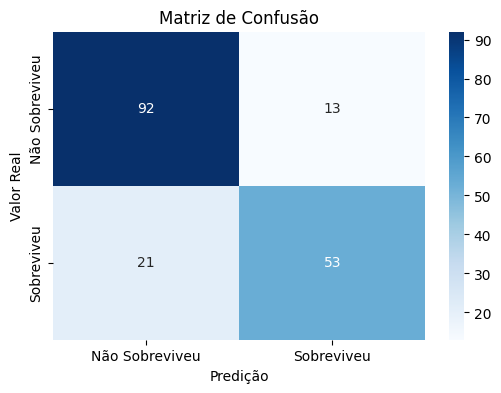

In [17]:
# Fazer predições no conjunto de teste -> Novo modelo (AUC ROC)
decision_scores = final_pipeline.decision_function(X_test)  # Para ROC AUC

# Mantém F1-score 
predictions = final_pipeline.predict(X_test)
test_f1_score = f1_score(y_test, predictions, average='macro')
print(f"\nTest Set F1 Score: {test_f1_score:.4f}")


# Calcular ROC AUC no conjunto de teste como métrica complementar 
test_auc_roc = roc_auc_score(y_test, decision_scores)
print(f"\nTest Set ROC AUC Score Complementary): {test_auc_roc:.4f}")

# Relatório de Classificação
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, predictions)
print("\nMatriz de Confusão:")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.title('Matriz de Confusão')
plt.show()


# Página 19 
## Paralelização - Multi Processing Optuna Optimization


In [18]:
!pip install joblib


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

storage = 'sqlite:///example.db'

def objective(trial, storage, study_name):
    # search space
    C = trial.suggest_float('C', 1e-2, 1e2, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 12)
    else:
        degree = 3  # Default value when not using 'poly' kernel

    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    coef0 = trial.suggest_float('coef0', -1.5, 1.5) if kernel in ['poly', 'sigmoid'] else 0.0
    shrinking = trial.suggest_categorical('shrinking', [True, False])
    tol = trial.suggest_float('tol', 1e-6, 1e-2, log=True)
    cache_size = trial.suggest_int('cache_size', 100, 10000)
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])
    max_iter = trial.suggest_int('max_iter', 100, 50000)
    decision_function_shape = trial.suggest_categorical('decision_function_shape', ['ovr', 'ovo'])
    break_ties = trial.suggest_categorical('break_ties', [False])

    # Criando o pipeline
    pipeline = Pipeline([
        ('svc', SVC(
            C=C,
            kernel=kernel,
            degree=degree,
            gamma=gamma,
            coef0=coef0,
            shrinking=shrinking,
            probability=False,
            tol=tol,
            cache_size=cache_size,
            class_weight=class_weight,
            max_iter=max_iter,
            random_state=42,
            decision_function_shape=decision_function_shape,
            break_ties=break_ties
        ))
    ])

    scores = []
    scores_auc = []

    # Set de cross-validation
    cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

    for train_idx, test_idx in cv.split(X_train, y_train):
        X_train_cv, X_test_cv = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_cv, y_test_cv = y_train.iloc[train_idx], y_train.iloc[test_idx]

        # Treinando o modelo (fit)
        pipeline.fit(X_train_cv, y_train_cv)

        # previsão e evaliação 
        y_pred = pipeline.predict(X_test_cv)
        score = f1_score(y_test_cv, y_pred, average='weighted')
        scores.append(score)

        # Decision Function for ROC AUC
        y_scores = pipeline.decision_function(X_test_cv)

        # ROC AUC Score
        score_auc = roc_auc_score(y_test_cv, y_scores)
        scores_auc.append(score_auc)

    # média F1 score
    return np.mean(scores)

def create_study(storage, study_name='parallel-study'):
    sampler = TPESampler(seed=42)
    study = optuna.create_study(
        direction='maximize',
        sampler=sampler,
        storage=storage,
        study_name=study_name,
        load_if_exists=True
    )
    return study

def worker(n_trials, storage, study_name):
    study = create_study(storage, study_name)
    study.optimize(lambda trial: objective(trial, storage, study_name), n_trials=n_trials, n_jobs=1)

def run_parallel_optimization(storage, study_name, n_jobs, n_trials_per_job):
    Parallel(n_jobs=n_jobs)(
        delayed(worker)(n_trials_per_job, storage, study_name) for _ in range(n_jobs)
    )




In [21]:
import time
import warnings
import optuna

if __name__ == '__main__':
    warnings.filterwarnings('ignore')  

    # logging
    optuna.logging.set_verbosity(optuna.logging.INFO)

    # backend para armazenar cada study
    storage = 'sqlite:///example.db'  # usando sqlite  (Pode ser PostgreSQL ou outro)

    # nome do study
    study_name = 'parallel-study'

    # parametros da paralelização
    n_jobs = 4  # quantidade de processos
    n_trials_per_job = 125  # quantidade de trials por processo

    # timing
    start_time = time.time()

    # Run parallel optimization
    run_parallel_optimization(storage, study_name, n_jobs, n_trials_per_job)

    # tempo total do processo
    elapsed_time = time.time() - start_time

    # Best trial
    study = create_study(storage, study_name)
    print('Number of finished trials:', len(study.trials))
    print('Best trial:', study.best_trial.params)

    # Print elapsed_time
    print(f'Total time elapsed: {elapsed_time/60:.2f} minnutes')

[I 2024-12-11 11:50:32,029] Using an existing study with name 'parallel-study' instead of creating a new one.


Number of finished trials: 6600
Best trial: {'C': 1.3878951649333078, 'kernel': 'rbf', 'gamma': 'scale', 'shrinking': False, 'tol': 0.0004667385378063134, 'cache_size': 1592, 'class_weight': None, 'max_iter': 9819, 'decision_function_shape': 'ovo', 'break_ties': False}
Total time elapsed: 3.66 minnutes


In [22]:
best_params = study.best_params.copy()
final_pipeline = Pipeline([
    ('svc', SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        degree=best_params.get('degree', 3),
        gamma=best_params['gamma'],
        coef0=best_params.get('coef0', 0.0),
        shrinking=best_params['shrinking'],
        probability=False,  
        tol=best_params['tol'],
        cache_size=best_params['cache_size'],
        class_weight=best_params['class_weight'],
        max_iter=best_params['max_iter'],
        random_state=42,

    ))
])

# Fit
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('svc',
                 SVC(C=1.3878951649333078, cache_size=1592, max_iter=9819,
                     random_state=42, shrinking=False,
                     tol=0.0004667385378063134))])


Test Set F1 Score: 0.8006

Test Set ROC AUC Score Complementary): 0.8421

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Matriz de Confusão:


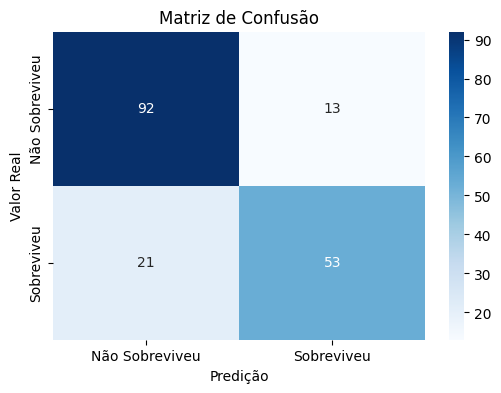

In [24]:
import seaborn as sns
# Fazer predições no conjunto de teste -> Novo modelo (AUC ROC)
decision_scores = final_pipeline.decision_function(X_test)  # Para ROC AUC

# Mantém F1-score 
predictions = final_pipeline.predict(X_test)
test_f1_score = f1_score(y_test, predictions, average='macro')
print(f"\nTest Set F1 Score: {test_f1_score:.4f}")


# Calcular ROC AUC no conjunto de teste como métrica complementar 
test_auc_roc = roc_auc_score(y_test, decision_scores)
print(f"\nTest Set ROC AUC Score Complementary): {test_auc_roc:.4f}")

# Relatório de Classificação
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, predictions)
print("\nMatriz de Confusão:")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Valor Real')
plt.xlabel('Predição')
plt.title('Matriz de Confusão')
plt.show()


# Desafio

## Crie um modelo de classificação usando SVM Classifier

### Comece pelo desafio **Iris** e Depois o **Wine**

1. **Dataset Iris**:

**from sklearn.datasets import load_iris**

**Descrição**: O dataset Iris contém informações sobre três espécies de flores de íris: setosa, versicolor, e virginica. São medidas quatro características:

- Comprimento da sépala (em cm)
- Largura da sépala (em cm)
- Comprimento da pétala (em cm)
- Largura da pétala (em cm)

**Objetivo**: O objetivo é treinar um modelo de classificação para identificar a espécie da flor (variável-alvo com três classes) com base nas medidas das pétalas e sépalas.

2. **Dataset Wine**

**from sklearn.datasets import load_wine** 

**Descrição**: O dataset Wine é mais avançado. Ele contém informações químicas sobre 178 vinhos divididos em três classes, que correspondem a diferentes variedades de vinho cultivadas na região da Itália. Possui 13 características numéricas, como:

- Álcool
- Ácido málico
- Fenóis totais
- Flavonoides
- Prolina (um aminoácido)

**Objetivo**: O objetivo é classificar o tipo de vinho (três classes: variedades 1, 2 e 3) com base em suas características químicas.

### **Observação**: Nas nossas aulas, não fizemos o EDA (Exploratory Data Analysis) essa parte fica por sua conta já que é pura análise de dados. Dica: Cheque a distribuição dos dados, valores faltantes, como imputar valores, checagem de classes... etc

# Bibliotecas Necessárias:
pip install pandas scikit-learn numpy matplotlib seaborn optuna

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

import optuna
from optuna.samplers import TPESampler

from sklearn.datasets import load_iris, load_wine

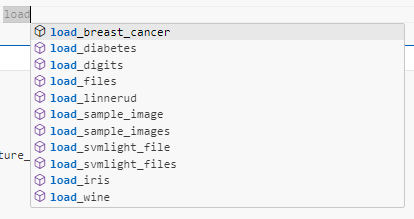 - Outras Bases

In [53]:
# Carregar o conjunto de dados Iris
iris = load_iris()

# Converter em DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adicionar a coluna target
df['target'] = iris.target

# Exibir as primeiras linhas do DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
# Carregar o conjunto de dados Iris
wine = load_wine()

# Converter em DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Adicionar a coluna target
df['target'] = wine.target

# Exibir as primeiras linhas do DataFrame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Bons Estudos!